In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

So in this I mean to use:
1. Prediction model for the case of missing values

In [2]:
!ls

2018_Analyze_This_Problem_Statement.docx  Correlation checking.ipynb
2018_Submission_deck.pptx		  Data_Dictionary.csv
Analyze_This1.ipynb			  Evaluation criteria.docx
Analyze_This2.ipynb			  Evaluation_dataset.csv
Analyze_This3.ipynb			  Guidelines_AnalyzeThis_2018.docx
Be_Professional_IITRoorkee_11.csv	  hackit
Be_Professional_IITRoorkee_12.csv	  Leaderboard_dataset.csv
Be_professional_IITRoorkee_24.csv	  sample_submission.csv
Be_Professional_IITRoorkee_6.csv	  Training_dataset_Original.csv
Be_Professional_IITRoorkee_8.csv


In [3]:
dataset = pd.read_csv('Training_dataset_Original.csv')
leaderboard_dataset = pd.read_csv('Leaderboard_dataset.csv')

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset.head(20)

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.000,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.000,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.000,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.000,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.000,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
5,230037,1579,NaN,3.502,0.000,0.0,missing,missing,missing,missing,...,na,missing,missing,1.5,0,NaN,na,na,C,1
6,230038,1818,0.4001,0.000,0.000,0.0,missing,1088,missing,1536,...,0,88.171,missing,0,2,0.87224,na,0,C,1
7,230039,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,...,na,missing,missing,missing,na,NaN,na,na,C,0
8,230040,1836,0.1358,0.000,0.000,0.0,347,38964,17828,70729,...,0,missing,missing,0,10,0.89868,0,0,L,0
9,230041,1839,0.1981,0.000,0.000,0.0,793,6131,6045,48959,...,0,missing,45.59,0.08824,14,0.33834,na,0,L,0


In [5]:
dataset.describe()

,application_key,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,default_ind
count,80000.000000,74447.000000,79499.000000,79499.000000,79499.00000,8.000000e+04,57439.000000,50876.000000,39752.000000,61098.000000,78249.000000,72255.000000,80000.000000
mean,270031.500000,1.105629,5.280955,0.474516,1.12472,1.960918e+05,57.790097,4423.856509,4305.929828,69.981834,6.996557,0.705285,0.246213
std,23094.155105,1.645299,10.815463,1.796261,5.99545,7.888377e+06,35.577165,3782.048321,3864.873106,300.080442,7.650139,0.245879,0.430806
min,230032.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.170000,0.000000,0.000000,0.000000,0.083300,0.060660,0.000000
25%,250031.750000,0.140100,0.000000,0.000000,0.00000,4.261300e+04,26.930000,726.715000,541.157500,9.892500,1.166700,0.515220,0.000000
50%,270031.500000,0.538900,0.300000,0.000000,0.00000,7.234300e+04,59.690000,3974.425000,3700.000000,40.440000,3.916700,0.737030,0.000000
75%,290031.250000,1.445050,6.447000,0.000000,0.00000,1.238750e+05,86.620000,7579.297500,7520.950000,76.540000,10.666700,0.943475,0.000000
max,310031.000000,44.630100,286.858000,114.696000,226.52700,9.910000e+08,1305.250000,64800.000000,124533.330000,27867.400000,76.000000,1.000000,1.000000


**Now first we will analyze the training_dataset alone without tampering it**

<h3> First we will find if there is any correlation between the ID column and the result </h3>

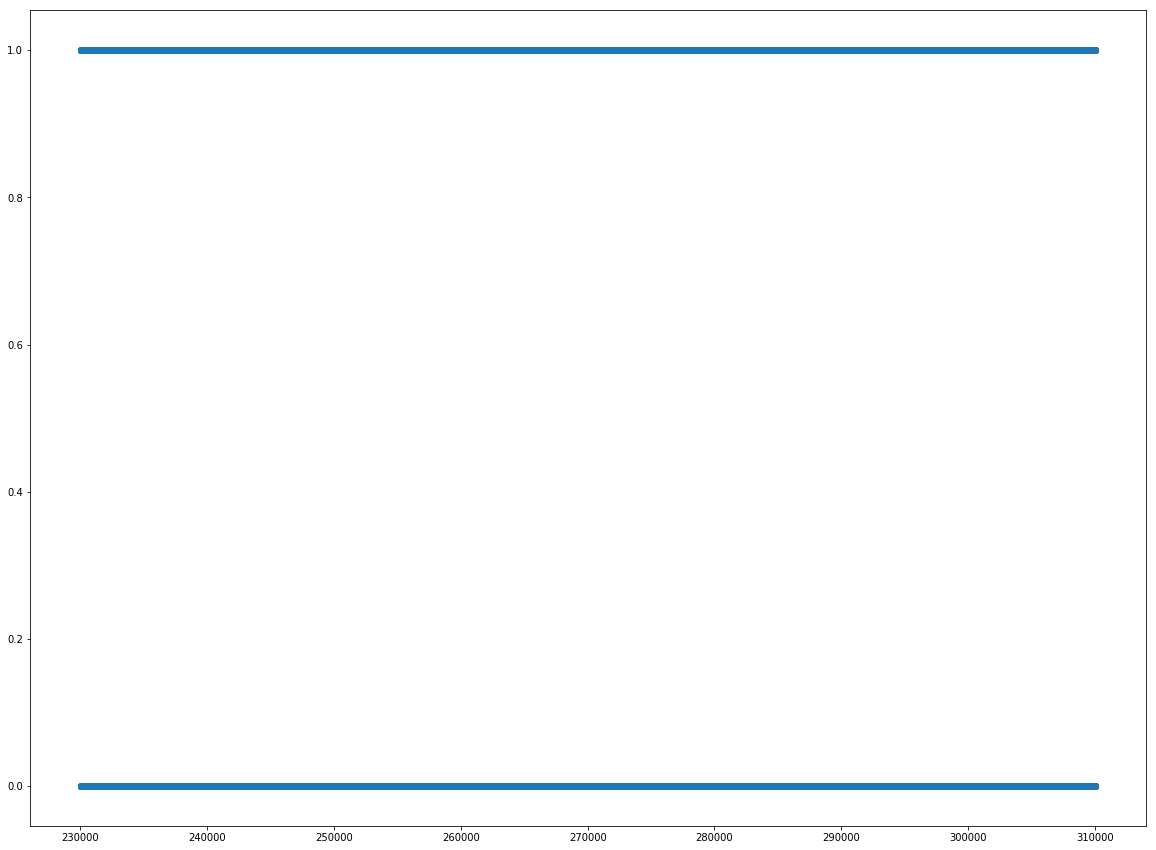

In [6]:
#Scatter plot between ID and default_ind
plt.subplots(figsize=(20, 15))
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, -1])

We can clearly see that there is no correlation between the two, so we remove the ID column

In [7]:
dataset = dataset.iloc[:, 1:]
leaderboard_dataset = leaderboard_dataset.iloc[:, 1:]

In [8]:
dataset.head(20)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696,1.6541,0.000,0.000,0.0,0,6015,322,40369,18414,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,1846,0.8095,0.000,0.000,0.0,102,7532,3171,18234,13664,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,1745,0.4001,0.000,0.000,0.0,missing,2536,missing,missing,2536,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,1739,0.2193,0.000,0.000,0.0,1982,26440,4955,20316,37013,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,1787,0.0118,0.225,0.000,0.0,5451,5494,5494,7987,4696,...,0,115.019,missing,0,1,0.92665,na,na,L,0
5,1579,NaN,3.502,0.000,0.0,missing,missing,missing,missing,0,...,na,missing,missing,1.5,0,NaN,na,na,C,1
6,1818,0.4001,0.000,0.000,0.0,missing,1088,missing,1536,1498,...,0,88.171,missing,0,2,0.87224,na,0,C,1
7,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,...,na,missing,missing,missing,na,NaN,na,na,C,0
8,1836,0.1358,0.000,0.000,0.0,347,38964,17828,70729,65843,...,0,missing,missing,0,10,0.89868,0,0,L,0
9,1839,0.1981,0.000,0.000,0.0,793,6131,6045,48959,31640,...,0,missing,45.59,0.08824,14,0.33834,na,0,L,0


<h3>Now we will find the correlation between the various variables</h3>

In [ ]:
sns.jointplot(dataset('')